# Assignment

Use the "from the expert" (FTE) jupyter notebook as a starter for this assignment, and ask your instructor questions if you need help.

Use the `churn_data.csv` file to carry out a similar EDA and visualization process as what we did in the FTE. Create at least 2 EDA plots, and create a HTML file with an auto-EDA analysis using pandas-profiling or another auto-EDA Python package. Write a short analysis at the end of the assignment in markdown. 

## Data science process steps this week
We will carry out the first two parts of the CRISP-DM data science process this week:

1. Business understanding

This is customer churn data for a telecommunications company. Customers can have phone as well as other services. The company is looking to reduce customer churn, where customers stop using the company's services and cancel their account. The 'Churn' column has a binary target, yes or no, that denotes if a customer churned. We want to create a machine learning model to predict the Churn target using the other available data in the dataset. Ideally, we will deploy this model to integrate with the company's database, so that a churn risk column is created for each customer. This will enable customer service reps and others to devise and use strategies to reduce churn.


2. Data understanding

Carry out some EDA as we did in the FTE, such as using pandas-profiling. Create a histogram like we did in the FTE, where we plot a numeric column with the target as the 'hue'. Optional challenge: create other plots with the target as the hue, such as bar plots for the categorical columns.

In [1]:
#importing libraries 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport
%matplotlib inline

In [2]:
#loading the dataset
df = pd.read_csv('C:/Users/Raviteja/Downloads/churn_data.csv')
df

,customerID,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,Mailed check,56.95,1889.50,No
2,3668-QPYBK,2,Yes,Month-to-month,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...
7038,6840-RESVB,24,Yes,One year,Mailed check,84.80,1990.50,No
7039,2234-XADUH,72,Yes,One year,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,11,No,Month-to-month,Electronic check,29.60,346.45,No
7041,8361-LTMKD,4,Yes,Month-to-month,Mailed check,74.40,306.60,Yes


In [3]:
df.head()

,customerID,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,Mailed check,56.95,1889.50,No
2,3668-QPYBK,2,Yes,Month-to-month,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Electronic check,70.70,151.65,Yes


# Numeric EDA

## info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customerID      7043 non-null   object 
 1   tenure          7043 non-null   int64  
 2   PhoneService    7043 non-null   object 
 3   Contract        7043 non-null   object 
 4   PaymentMethod   7043 non-null   object 
 5   MonthlyCharges  7043 non-null   float64
 6   TotalCharges    7032 non-null   float64
 7   Churn           7043 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 440.3+ KB


## describe

In [5]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


## unique

In [6]:
print(df['tenure'],df['MonthlyCharges'],df['TotalCharges'])

0        1
1       34
2        2
3       45
4        2
        ..
7038    24
7039    72
7040    11
7041     4
7042    66
Name: tenure, Length: 7043, dtype: int64 0        29.85
1        56.95
2        53.85
3        42.30
4        70.70
         ...  
7038     84.80
7039    103.20
7040     29.60
7041     74.40
7042    105.65
Name: MonthlyCharges, Length: 7043, dtype: float64 0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64


In [7]:
df['tenure'].unique(),df['MonthlyCharges'].unique(),df['TotalCharges'].unique()

(array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
        21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
         9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
        36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
        54, 51, 26,  0, 39], dtype=int64),
 array([29.85, 56.95, 53.85, ..., 63.1 , 44.2 , 78.7 ]),
 array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ]))

## Value_counts

In [8]:
df['tenure'].value_counts(), df['MonthlyCharges'].value_counts(), df['TotalCharges'].value_counts()

(tenure
 1     613
 72    362
 2     238
 3     200
 4     176
      ... 
 28     57
 39     56
 44     51
 36     50
 0      11
 Name: count, Length: 73, dtype: int64,
 MonthlyCharges
 20.05     61
 19.85     45
 19.95     44
 19.90     44
 20.00     43
           ..
 23.65      1
 114.70     1
 43.65      1
 87.80      1
 78.70      1
 Name: count, Length: 1585, dtype: int64,
 TotalCharges
 20.20      11
 19.75       9
 20.05       8
 19.90       8
 19.65       8
            ..
 6849.40     1
 692.35      1
 130.15      1
 3211.90     1
 6844.50     1
 Name: count, Length: 6530, dtype: int64)

<Axes: xlabel='tenure'>

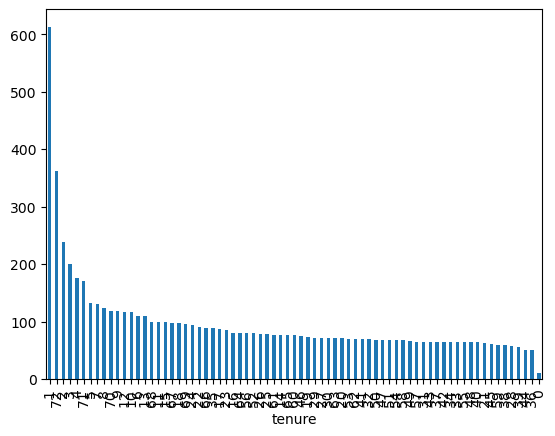

In [9]:
df['tenure'].value_counts().plot.bar()

<Axes: xlabel='MonthlyCharges'>

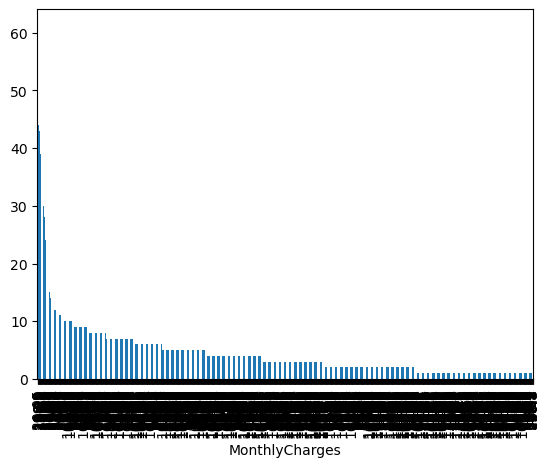

In [10]:
df['MonthlyCharges'].value_counts().plot.bar()

<Axes: xlabel='TotalCharges'>

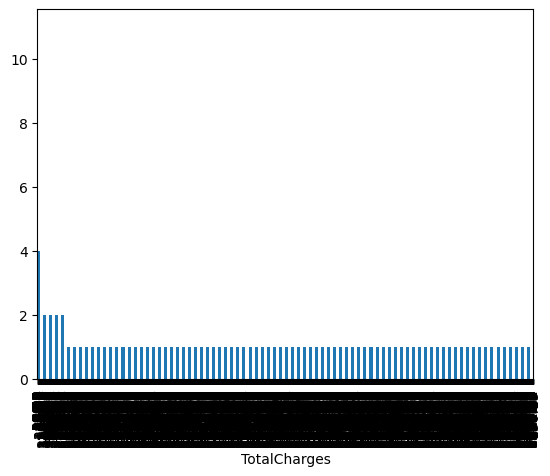

In [11]:
df['TotalCharges'].value_counts().plot.bar()

## Pandas ydata_Profiling

In [12]:
profile = ProfileReport(df, title='Churn Data - ydata_Profiling Report', explorative=True, correlations={"auto": {"calculate": False}})
profile.to_file("churn_eda_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Bar plots for categorical columns using Matplotlib package

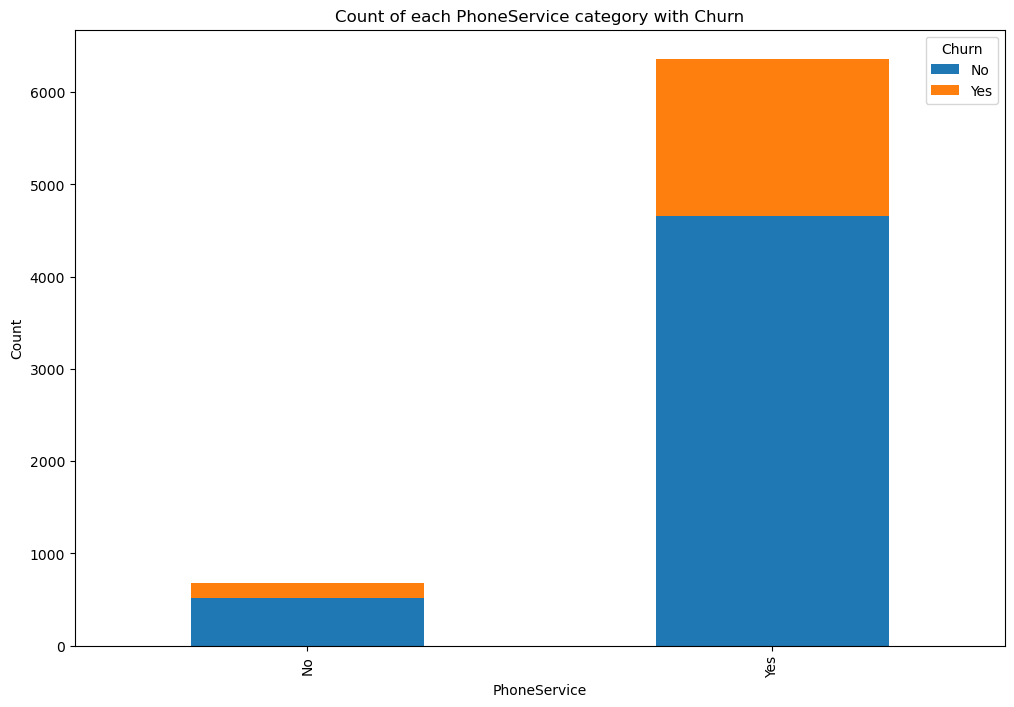

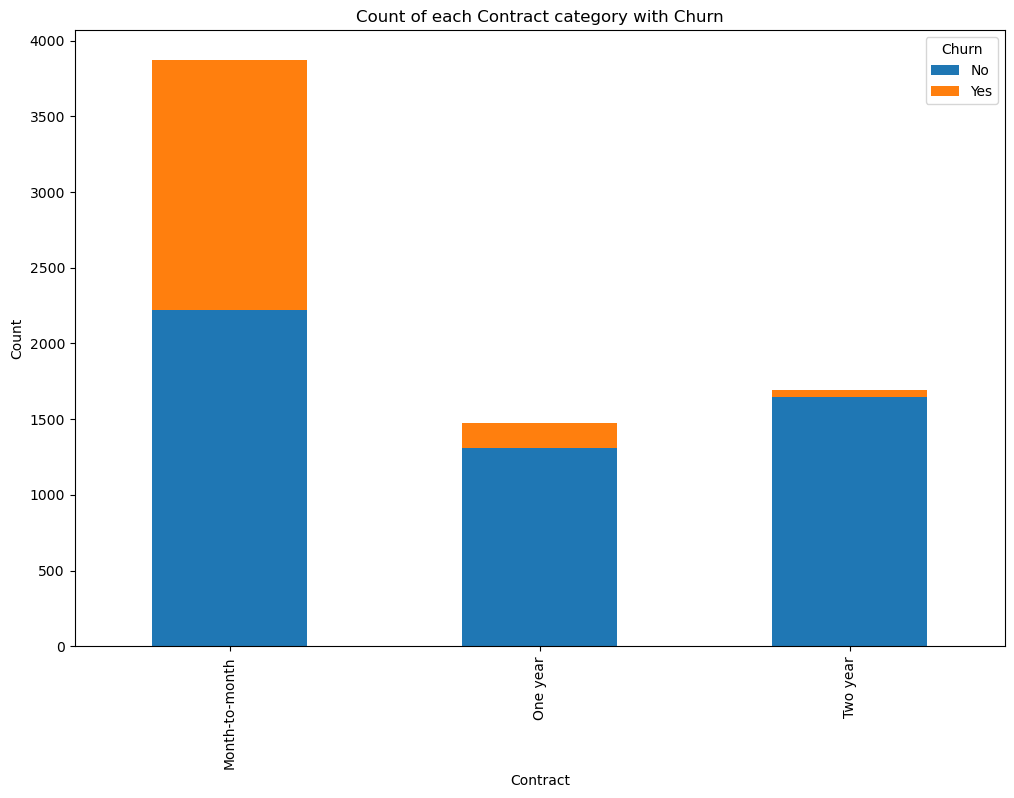

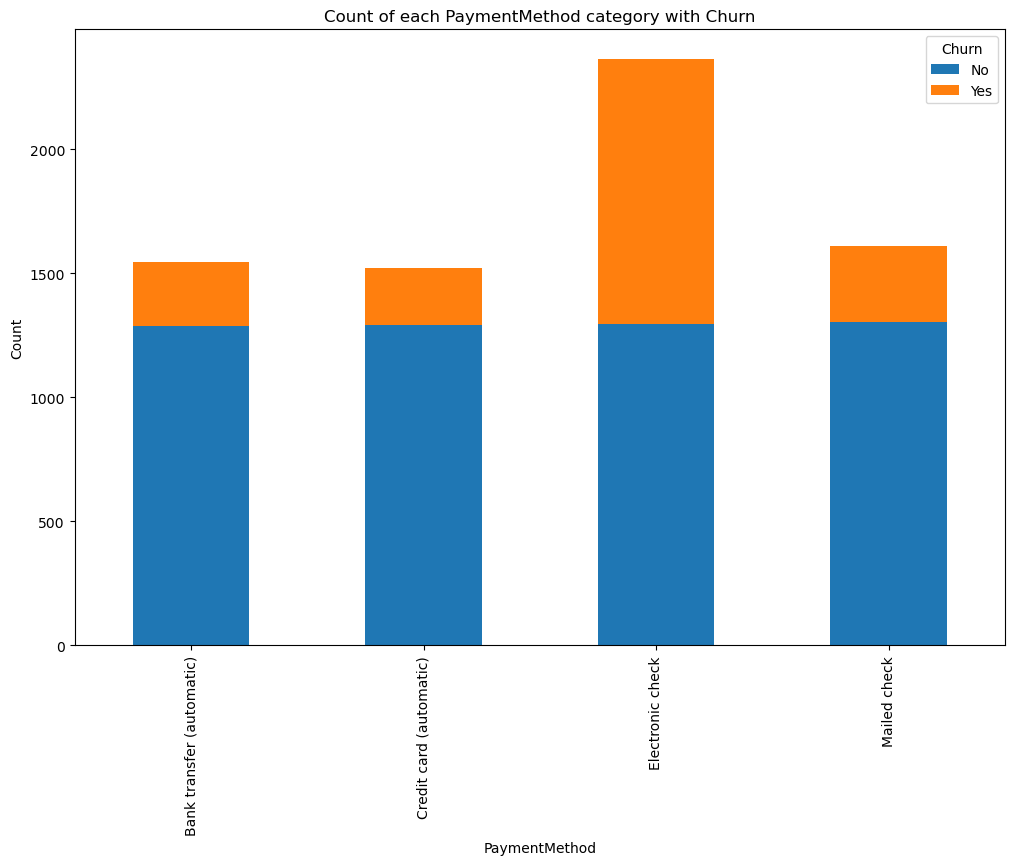

In [13]:
categorical_columns = ['PhoneService', 'Contract', 'PaymentMethod']

for column in categorical_columns:
    categories = df[column].unique()
    churn_counts = df.groupby([column, 'Churn']).size().unstack()

    fig, ax = plt.subplots(figsize=(12, 8))
    churn_counts.plot(kind='bar', stacked=True, ax=ax)
    plt.title(f'Count of each {column} category with Churn')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()


## Bar plots for categorical columns using Seaborn package

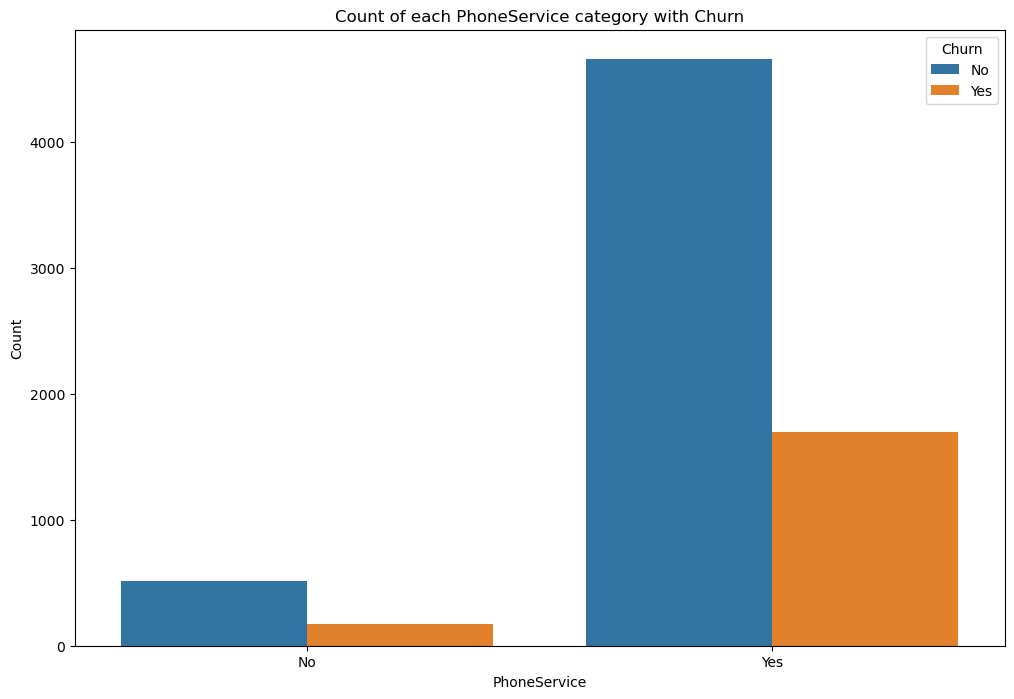

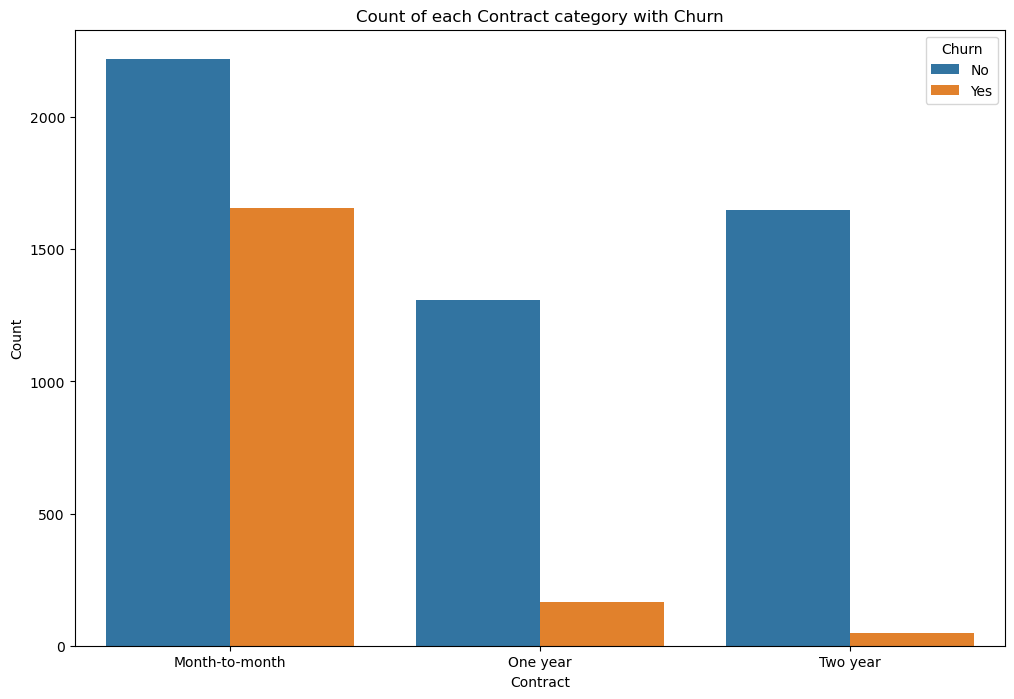

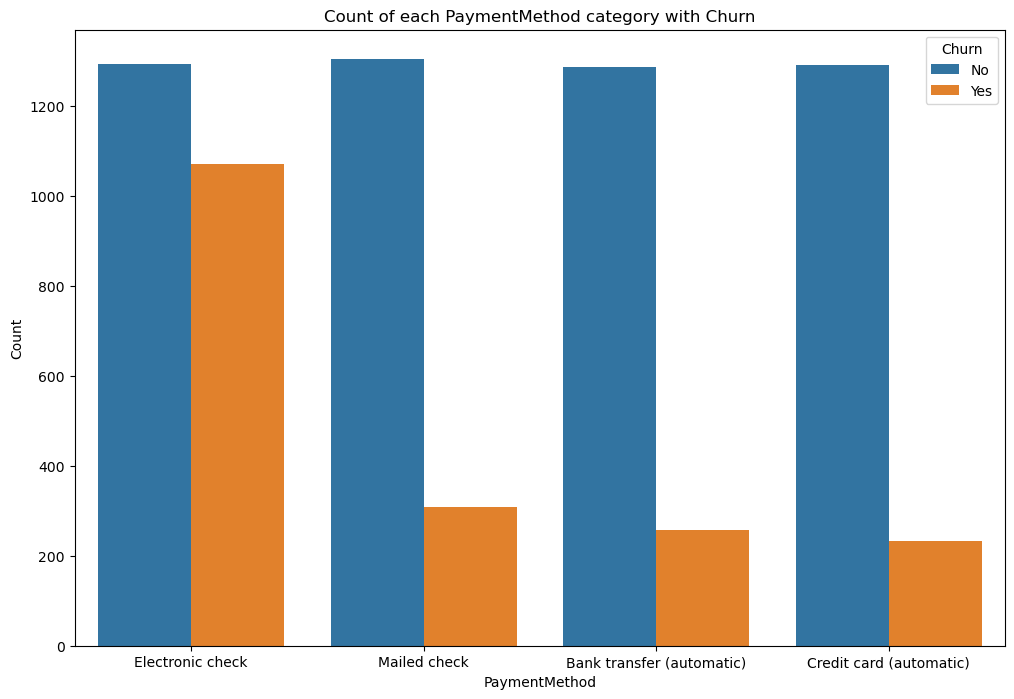

In [14]:
categorical_columns = ['PhoneService', 'Contract', 'PaymentMethod']

for column in categorical_columns:
    plt.figure(figsize=(12, 8))
    sns.countplot(x=column, data=df, hue='Churn')
    plt.title(f'Count of each {column} category with Churn')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

## Histograms for numeric columns using matplotlib package

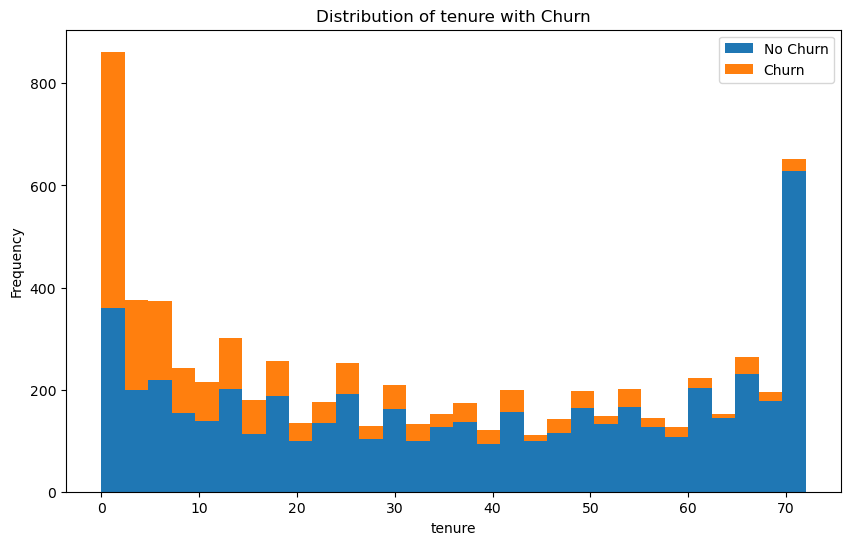

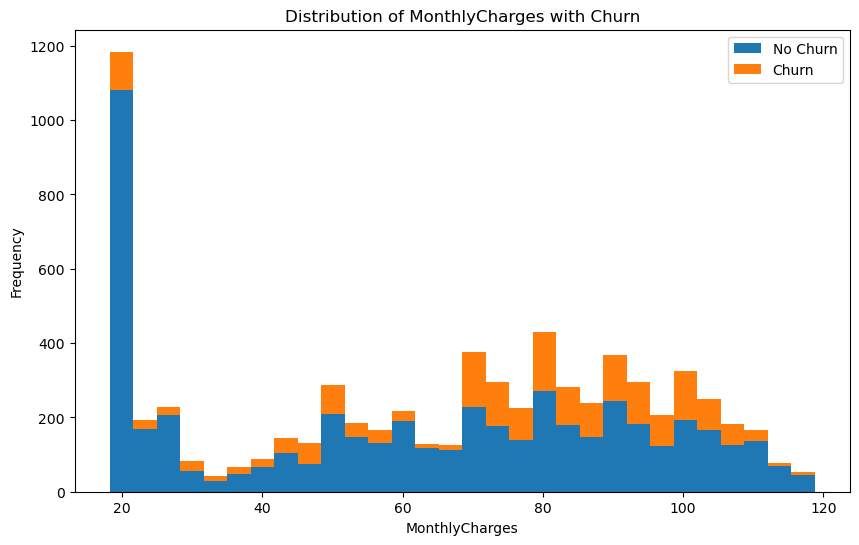

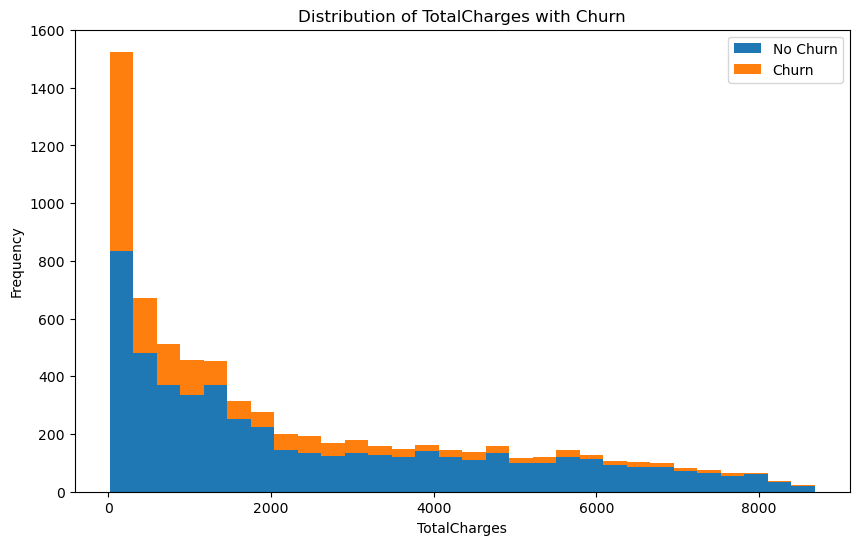

In [15]:
numeric_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

for column in numeric_columns:
    fig, ax = plt.subplots(figsize=(10, 6))
    churn_values = [df[df['Churn'] == 'No'][column], df[df['Churn'] == 'Yes'][column]]
    ax.hist(churn_values, bins=30, stacked=True, label=['No Churn', 'Churn'])
    plt.title(f'Distribution of {column} with Churn')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()


## Histograms for numeric columns using seaborn package

C:\Users\Raviteja\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Raviteja\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Raviteja\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Raviteja\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When groupin

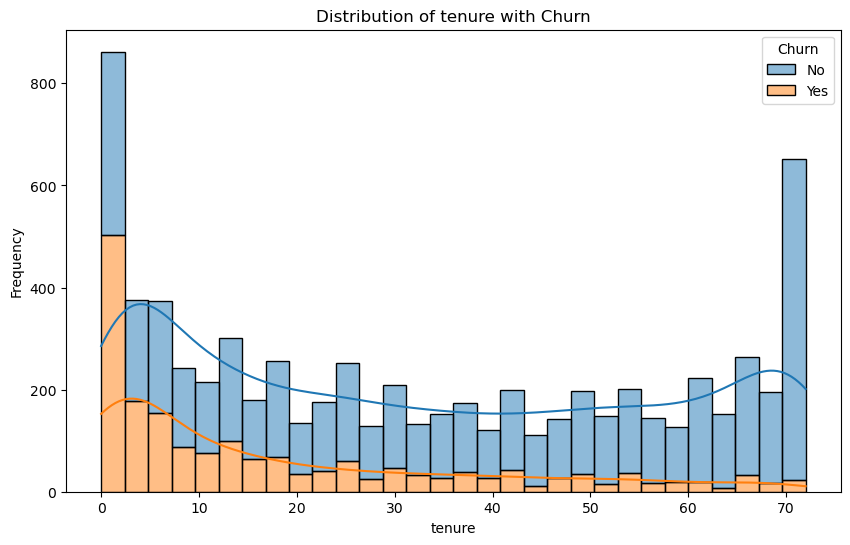

C:\Users\Raviteja\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Raviteja\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Raviteja\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Raviteja\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When groupin

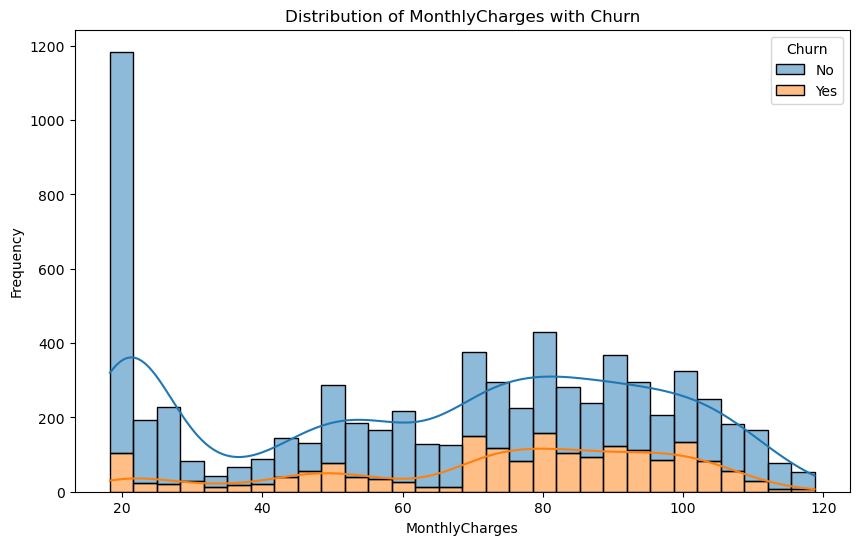

C:\Users\Raviteja\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Raviteja\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Raviteja\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Raviteja\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When groupin

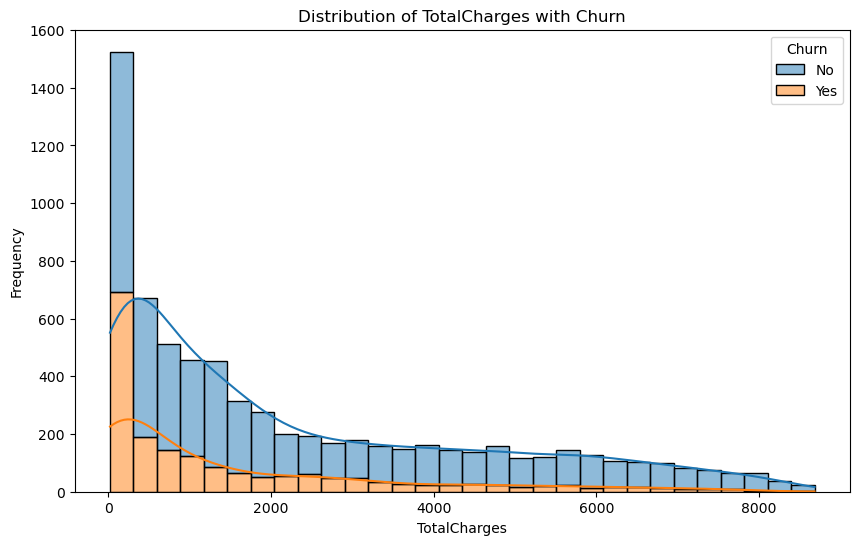

In [16]:
numeric_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=column, hue='Churn', bins=30, kde=True, multiple='stack')
    plt.title(f'Distribution of {column} with Churn')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

## Scatter plot for two numeric columns using Matplotlib package

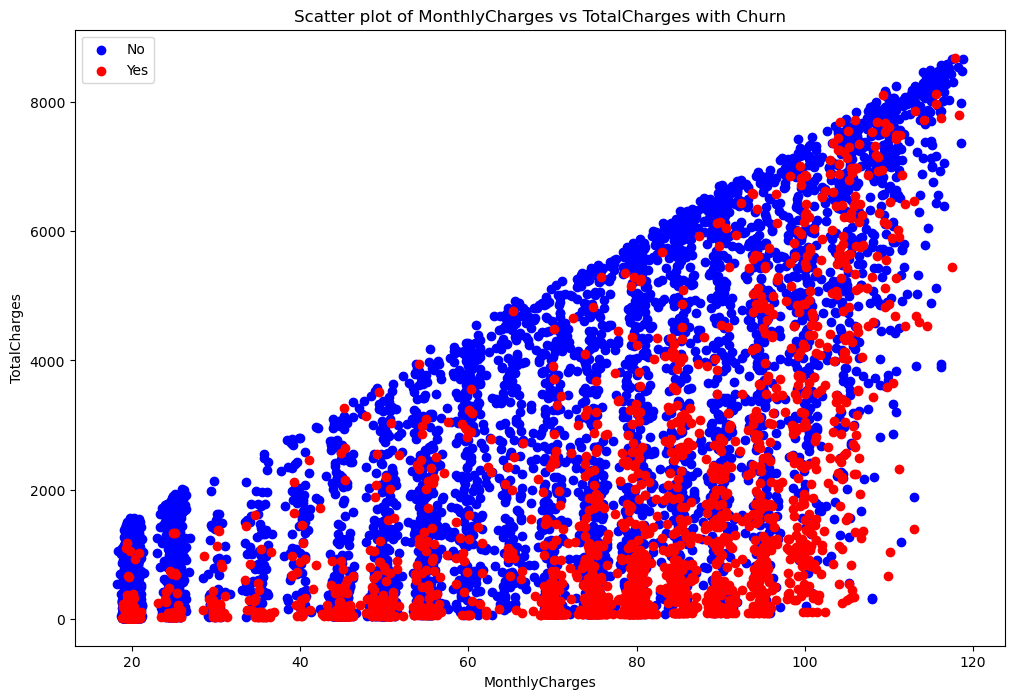

In [17]:
fig, ax = plt.subplots(figsize=(12, 8))
scatter_colors = {'No': 'blue', 'Yes': 'red'}
for churn, color in scatter_colors.items():
    ax.scatter(df[df['Churn'] == churn]['MonthlyCharges'], df[df['Churn'] == churn]['TotalCharges'], label=churn, c=color)

plt.title('Scatter plot of MonthlyCharges vs TotalCharges with Churn')
plt.xlabel('MonthlyCharges')
plt.ylabel('TotalCharges')
plt.legend()
plt.show()


## Scatter plot for two numeric columns using Seaborn package

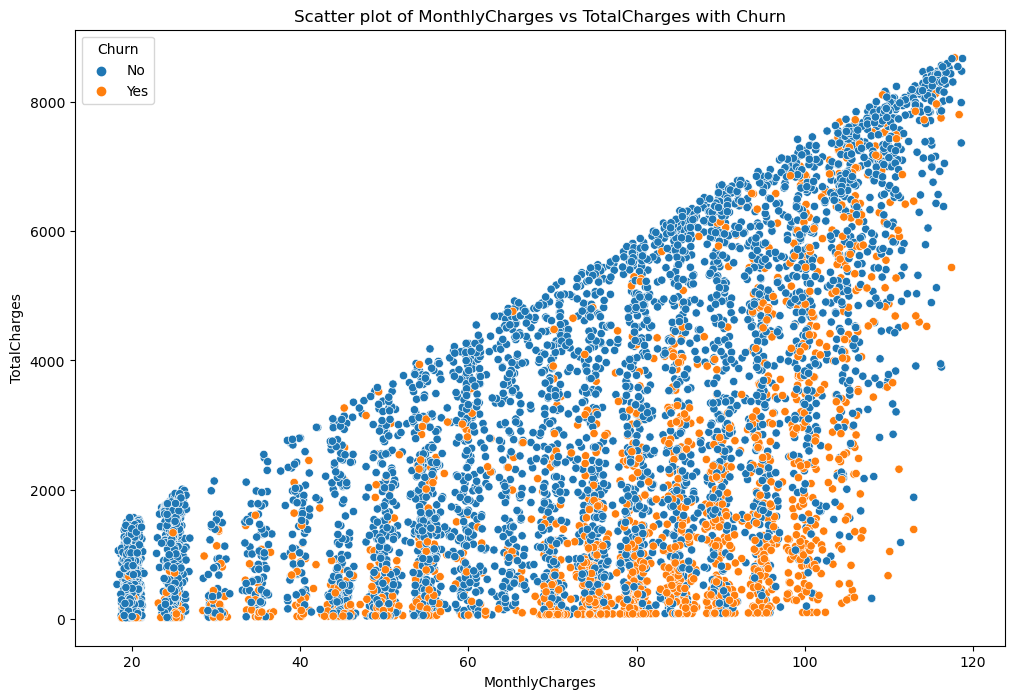

In [18]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='MonthlyCharges', y='TotalCharges', data=df, hue='Churn')
plt.title('Scatter plot of MonthlyCharges vs TotalCharges with Churn')
plt.xlabel('MonthlyCharges')
plt.ylabel('TotalCharges')
plt.show()

## Filtering

In [19]:
filtered_df = df[df['tenure'] > 20]
filtered_df.head()

,customerID,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,5575-GNVDE,34,Yes,One year,Mailed check,56.95,1889.50,No
3,7795-CFOCW,45,No,One year,Bank transfer (automatic),42.30,1840.75,No
6,1452-KIOVK,22,Yes,Month-to-month,Credit card (automatic),89.10,1949.40,No
8,7892-POOKP,28,Yes,Month-to-month,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,62,Yes,One year,Bank transfer (automatic),56.15,3487.95,No


# Churn Data Analysis

## Overview
This analysis explores the customer churn data for a telecommunications company. The objective is to understand patterns and factors influencing customer churn, with the ultimate goal of developing a machine learning model to predict churn.

## Exploratory Data Analysis (EDA)

### Auto-EDA with Pandas-Profiling
I performed an Auto-EDA using the ydata-Profiling library, generating an interactive HTML report (`churn_eda_report.html`). This report provides a comprehensive overview of the dataset, including summary statistics, missing values, and visualizations.

### Custom EDA Plots
I conducted an Exploratory Data Analysis (EDA) using visualizations to uncover patterns and insights within the dataset. The analysis included bar plots for categorical columns, histograms for numeric columns, and a scatter plot to explore the relationship between two numeric columns.

### Bar Plots for Categorical Columns:

1. **PhoneService**

   - The bar plot for PhoneService reveals the count of customers with and without phone services, differentiated by 'Churn'. It indicates that customers with phone services are more likely to churn compared to those without.

2. **Contract**
   - The Contract bar plot showcases the count of customers based on different contract types (Month-to-Month, One Year, Two Year) with 'Churn' as the hue. Notably, customers with Month-to-Month contracts exhibit higher churn rates, suggesting that contract duration plays a significant role in predicting churn.

3. **PaymentMethod**
    - The PaymentMethod bar plot displays the count of customers for each payment method with 'Churn' as the hue. It provides insights into how different payment methods correlate with customer churn. For instance, customers using Electronic check show higher churn rates.
    

### Histograms for Numeric Columns:

1. **Tenure Distribution with Churn**

   - The histogram for tenure illustrates the distribution of customer tenure with 'Churn' as the hue. It shows that customers with shorter tenure are more likely to churn, while those with longer tenure tend to have lower churn rates.

2. **MonthlyCharges Distribution with Churn**
   - The histogram for MonthlyCharges depicts the distribution of monthly charges with 'Churn' as the hue. It suggests that customers with higher monthly charges are more prone to churn, indicating a potential correlation between charges and churn.

3. **TotalCharges Distribution with Churn**
    - The histogram for TotalCharges displays the distribution of total charges with 'Churn' as the hue. It provides insights into how the total charges influence customer churn.
    
### Scatter Plot for Numeric Columns:

    - The scatter plot of MonthlyCharges vs TotalCharges with 'Churn' as the hue provides a visual representation of the relationship between these two numeric columns. It helps identify any discernible patterns or trends in the charges' impact on churn.

## Observations and Next Steps
- The Pandas-Profiling report highlights important information about the dataset, such as potential correlations and data quality issues.
- The EDA visualizations offer valuable insights into the dataset, highlighting key factors influencing customer churn. These findings can guide further analysis, model development, and strategies aimed at reducing churn and enhancing customer retention.

This preliminary analysis lays the foundation for more in-depth investigations and model development to assist the telecommunications company in devising strategies to reduce customer churn.

## References

### Matplotlib: https://matplotlib.org/stable/plot_types/index.html , https://matplotlib.org/stable/tutorials/index.html


### Seaborn: https://seaborn.pydata.org  , https://seaborn.pydata.org/tutorial.html
    

## Optional creating profiling using sweetviz

In [22]:
import sweetviz as sv

In [23]:
final_report = sv.analyze(df)
final_report.show_html('sweetviz_report_churn_eda.html')

                                             |          | [  0%]   00:00 -> (? left)

Report sweetviz_report_churn_eda.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
